#### Importing the modules

In [246]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math as m
from numpy import concatenate as npcon

In [247]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#### Getting the data

In [248]:
df = pd.read_csv('./adult-updated.csv')

In [249]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [250]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<AxesSubplot:xlabel='income', ylabel='count'>

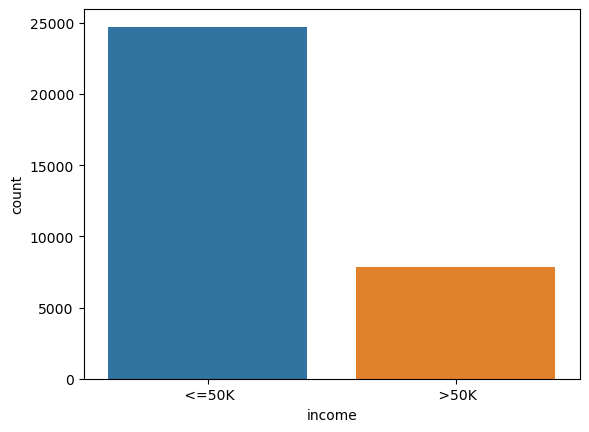

In [251]:
sns.countplot(x='income', data=df)

In [252]:
df["income"].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [253]:
df.drop(['education'], axis=1, inplace=True)

In [254]:
# printing the above information in percentage for a better understanding
print(f"there are {round(24270/32561 * 100, 2)}% persons who have a income <= 50K")
print(f"there are {round(7841/32561 * 100, 2)}% persons who have a income > 50K")

there are 74.54% persons who have a income <= 50K
there are 24.08% persons who have a income > 50K


#### Performing feature engineering in-order to extract valulable information from the given raw data

In [255]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [256]:
numerical = [x for x in df.columns if df[x].dtypes != "0"]

In [257]:
for i in numerical:
    print(f"{i} : {len(df[i].unique())}")

age : 73
workclass : 9
fnlwgt : 21648
education_num : 16
marital_status : 7
occupation : 15
relationship : 6
race : 5
sex : 2
capital_gain : 119
capital_loss : 92
hours_per_week : 94
native_country : 42
income : 2


In [258]:
df['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [259]:
numeric_cols = ['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week']

In [260]:
features = ['workclass', 'occupation', 'marital_status', 'occupation',
            'relationship', 'race', 'sex', 'native_country', 'income']


In [261]:
for y in features:
    le = LabelEncoder()
    df[y] = le.fit_transform(df[y])

In [262]:
df.head()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,7,77516,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,13,2,10,5,2,0,0,0,40,5,0


In [263]:
for a in numeric_cols:
    std = StandardScaler()
    df[a] = std.fit_transform(df[[a]]).flatten()

In [264]:
df.head()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.030671,7,-1.063611,13,4,1,1,4,1,0.148453,-0.21666,-0.035429,39,0
1,0.837109,6,-1.008707,13,2,4,0,4,1,-0.145920,-0.21666,-2.222153,39,0
2,-0.042642,4,0.245079,9,0,6,1,4,1,-0.145920,-0.21666,-0.035429,39,0
3,1.057047,4,0.425801,7,2,6,0,2,1,-0.145920,-0.21666,-0.035429,39,0
4,-0.775768,4,1.408176,13,2,10,5,2,0,-0.145920,-0.21666,-0.035429,5,0


#### splitting the data into training and test set

In [265]:
X = df.drop(['income'], axis=1)
y = df['income']

In [266]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=42, stratify=y)

In [267]:
print(np.shape(X_train))
print(np.shape(X_test))
print(np.shape(y_train))
print(np.shape(y_test))

(24420, 13)
(8141, 13)
(24420,)
(8141,)


#### Model Selection

#### Logistic Regression

In [268]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [269]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [270]:
classifier.predict(sc.transform(X_train))

c:\Users\soume\miniconda3\envs\octpro\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0])

In [271]:
y_pred = classifier.predict(X_test)

In [272]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [273]:
cm = confusion_matrix(y_test, y_pred)
print(cm) # confustion matrix
log_classifier_accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

[[5821  360]
 [1044  916]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      6181
           1       0.72      0.47      0.57      1960

    accuracy                           0.83      8141
   macro avg       0.78      0.70      0.73      8141
weighted avg       0.82      0.83      0.81      8141



#### Misclassification Rate

In [274]:
misc_rate = (360 + 1044) / 8141
misc_rate_per = ((360 + 1044) / 8141) * 100
print(f"misc rate: {misc_rate:.2f}%")

# accuracy = 1 - misc_rate
print(f"accuracy_score: {(1 - misc_rate)*100:.2f}%")

misc rate: 0.17%
accuracy_score: 82.75%


#### Decision Tree Classifier

In [275]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [276]:
classifier.predict(sc.transform(X_train))

c:\Users\soume\miniconda3\envs\octpro\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 1, 0])

In [277]:
y_pred = classifier.predict(X_test)

In [278]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
confusion_matrixdtc = confusion_matrix(y_test, y_pred)
decisiontree_accuracy = accuracy_score(y_test, y_pred)
print(confusion_matrixdtc)
print(classification_report(y_test, y_pred))

[[5388  793]
 [ 708 1252]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      6181
           1       0.61      0.64      0.63      1960

    accuracy                           0.82      8141
   macro avg       0.75      0.76      0.75      8141
weighted avg       0.82      0.82      0.82      8141



#### Misclassification Rate

In [279]:
misc_rate = (793 + 708) / 8141
misc_rate_per = ((793 + 708) / 8141) * 100
print(f"misc_rate: {misc_rate_per:.2f}%")

# accuracy: 1 - misc_rate
print(f"accuracy: {(1 - misc_rate)*100:.2f}%")

misc_rate: 18.44%
accuracy: 81.56%


#### Random Forest Classifer Model and Report

In [280]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=0)

In [281]:
y_pred = classifier.predict(X_test)

In [282]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
confustion_matrixrfc = confusion_matrix(y_test, y_pred)
print(confusion_matrixdtc)
rtc_classifier_report = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

[[5388  793]
 [ 708 1252]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      6181
           1       0.74      0.61      0.67      1960

    accuracy                           0.86      8141
   macro avg       0.81      0.77      0.79      8141
weighted avg       0.85      0.86      0.85      8141



#### Misclassification Report

In [283]:
misc_rate = (793 + 708) / 8141
misc_rate_per = ((793 + 708) / 8141) * 100
print(f"misc_rate: {misc_rate_per:.2f}%")

# accuracy: 1 - misc_rate
print(f"accuracy: {(1 - misc_rate)*100:.2f}%")

misc_rate: 18.44%
accuracy: 81.56%


#### KNN Classifier

In [284]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [285]:
classifier.predict(sc.transform(X_train))

c:\Users\soume\miniconda3\envs\octpro\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0])

In [286]:
y_pred = classifier.predict(X_test)

In [287]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
confusion_matrixknn = confusion_matrix(y_test, y_pred)
print(confusion_matrixknn)
knn_accuracy_report = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

[[5587  594]
 [ 749 1211]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      6181
           1       0.67      0.62      0.64      1960

    accuracy                           0.84      8141
   macro avg       0.78      0.76      0.77      8141
weighted avg       0.83      0.84      0.83      8141



#### Misclassification Report

In [288]:
misc_rate = (594 + 749) / 8141
misc_rate_per = ((594 + 749) / 8141) * 100
print(f"misc_rate: {misc_rate_per:.2f}%")

# accuracy: 1 - misc_rate
print(f"accuracy: {(1 - misc_rate)*100:.2f}%")

misc_rate: 16.50%
accuracy: 83.50%


In [289]:
print(f"Decision Tree Classifier: {decisiontree_accuracy:.4f}")
print(f"Random Forest Classifier: {rtc_classifier_report:.4f}") # for trees = 20
print(f"KNN: {knn_accuracy_report:.3f}")
print(f"LogisticRegression classifier model accuracy report: {log_classifier_accuracy:.3f}")

Decision Tree Classifier: 0.8156
Random Forest Classifier: 0.8557
KNN: 0.835
LogisticRegression classifier model accuracy report: 0.828


#### SVC Classifier (with linear kernel)

In [290]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [291]:
x, y = make_classification(n_samples=5000, n_features=10,
                           n_classes=3,
                           n_clusters_per_class=1)

In [292]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25)

In [293]:
lsvc = LinearSVC(verbose=0)
print(lsvc)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

LinearSVC()


LinearSVC()

In [294]:
lsvc.fit(xtrain, ytrain)
score = lsvc.score(xtrain, ytrain)
print("Score: ", score)

Score:  0.8970666666666667


In [295]:
cv_scores = cross_val_score(lsvc, xtrain, ytrain, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

CV average score: 0.90


In [296]:
ypred = lsvc.predict(xtest)

cm = confusion_matrix(ytest, ypred)
print(cm)

[[376   1  23]
 [  7 402  40]
 [ 37   2 362]]


#### Misclassification Report

In [297]:
from sklearn.metrics import accuracy_score
print(f"accuracy_score: {accuracy_score(y_test, y_pred)*100:.2f}%")

accuracy_score: 83.50%


In [298]:
cr = classification_report(ytest, ypred)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       400
           1       0.99      0.90      0.94       449
           2       0.85      0.90      0.88       401

    accuracy                           0.91      1250
   macro avg       0.91      0.91      0.91      1250
weighted avg       0.92      0.91      0.91      1250

